## Склейка изображений

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

In [3]:
def blend_image(A, B): 
    b, g, r = cv2.split(A)
    A = cv2.merge([r, g, b])
 
    b, g, r = cv2.split(B)
    B= cv2.merge([r, g, b])
 
    A=cv2.resize(A,(240,240))
    B = cv2.resize(B, (240, 240))
    G = A.copy()
    gpA = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpA.append(G)
    # Сгенерировать гауссову пирамиду для рисунка B
    G = B.copy()
    gpB = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpB.append(G)
    # Построить пирамиду Лапласиана для рисунка A
    lpA = [gpA[5]]
    # print(np.array(lpA).shape)
    for i in range(5, 0, -1):
        size = (gpA[i - 1].shape[1], gpA[i - 1].shape[0])
        GE = cv2.pyrUp(gpA[i],dstsize=size)
        L = cv2.subtract(gpA[i - 1], GE)
        lpA.append(L)
    # Создать пирамиду Лапласиана для рисунка B
    lpB = [gpB[5]]
    for i in range(5, 0, -1):
        size = (gpB[i - 1].shape[1], gpB[i - 1].shape[0])
        GE = cv2.pyrUp(gpB[i],dstsize=size)
        L = cv2.subtract(gpB[i - 1], GE)
        lpB.append(L)
    # Добавить левую и правую 
    # половины изображений на каждом уровне
    LS = []
    for la, lb in zip(lpA, lpB):
        rows, cols, dpt = la.shape
        ls = np.hstack((la[:, 0:cols // 2], lb[:, cols // 2:]))
        LS.append(ls)
    # Востановить изображения
    ls_ = LS[0]
    for i in range(1, 6):
        size = (LS[i].shape[1], LS[i].shape[0])
        ls_ = cv2.pyrUp(ls_,dstsize=size)
        ls_ = cv2.add(ls_, LS[i])
    plt.title('Слияние с помощью пирамид', fontsize=14)
    plt.imshow(ls_)

In [4]:
def direct_merge(A, B):
    b, g, r = cv2.split(A)
    A = cv2.merge([r, g, b])
    b, g, r = cv2.split(B)
    B= cv2.merge([r, g, b]) 
    A=cv2.resize(A,(500,500))
    B=cv2.resize(B,(500,500))
    
    C = A.copy()
    
    for i in range(500):
        for j in range(500):
            if j <= 250:
                C[i][j] = A[i][j]
            else:
                C[i][j] = B[i][j]
    plt.title('Прямое слияние', fontsize=14)
    plt.imshow(C)

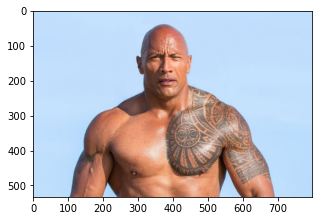

In [5]:
image1 = cv2.imread('1.jpeg', 3)
A = cv2.resize(image1, (500, 500), interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

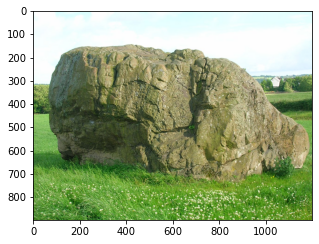

In [6]:
image2 = cv2.imread('2.jpg', 3)
B = cv2.resize(image2, (500, 500), interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

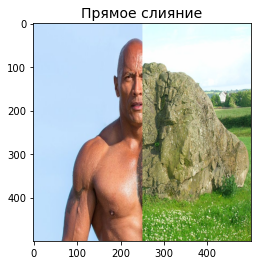

In [7]:
direct_merge(A, B)

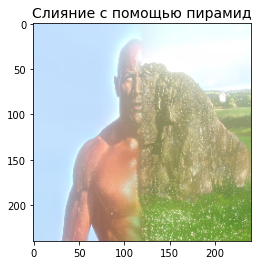

In [8]:
blend_image(A, B)